# IPython notebook features overview

IPython allows to create a formatted document containing text, equations, and code. There is a WYSIWYG interface: the ipython notebook.

The document is split into cells. Cells can be of three types:

* Code
* Markdown (simple wiki markup language)
* Raw

This current cell is a markdown cell.

It is possible to use **bold**, *itallic*, and `verbatim`.

    This is some verbatim code.
    $ echo "helloworld"

In addition, it is possible, through python, to add all sorts of contents (html, video, audio, ...) to the page. This notebook aims at demonstrating these possibilities through a number of practical examples.

## Numerical cells and plots

Just like ipython, ipython notebook let's you import easily all the numpy and matplotlib libraries and use them 'matlab' style.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The `inline` option let's you plot things in the notebook directly.

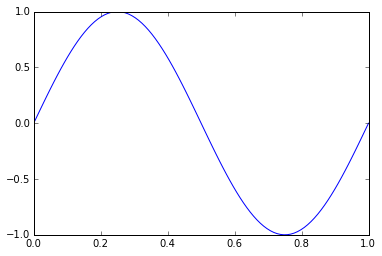

In [2]:
t = linspace(0,1,100)
plot(t, sin(2*pi*t))

## Built-in help

In case you need to be reminded of some syntax, several ways are possible. The first is auto-completion:

In [3]:
# t = lins

It is also possible to display the docstring of a function.

In [4]:
linspace?

The following let's you get even more information and look a the source code.

In [5]:
linspace??

## Magic

Many [ipython magics](http://ipython.readthedocs.org/en/stable/interactive/magics.html) can also be used in ipython notebook. They can be listed using the `%lsmagic` magic.

In [6]:
%lsmagic

Available line magics:
%aimport  %alias  %alias_magic  %autocall  %automagic  %autoreload  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%

One can for example use the `%timeit` magic to compare the runtime of two pieces of code. For example, let's compare a pure python recursive implementation of the factorial to an implementation using numpy vector routines.

In [7]:
# recursive implementation
def factorial_1(n):
    if n > 1:
        return n*factorial_1(n-1)
    else:
        return 1
    
# numpy implementation
def factorial_2(n):
    return np.prod(np.arange(1,n+1))

In [8]:
%timeit factorial_1(100)

The slowest run took 6.20 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 21.8 µs per loop


In [9]:
%timeit factorial_2(100)

The slowest run took 9.11 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 5.6 µs per loop


## Equations

IPython notebooks allow to display equations just by typing in latex. For example, we can write the famous Fourier transform equation as
$$
\int_{-\infty}^\infty f(t) e^{-i\omega t} dt.
$$

It is also possible to add some math in text, for example  a linear system $Ax = b$.

## Images

It is possible to include images in the notebooks, either by adding the html tags directly in markdown cell such as the following:

<img src="http://mediacom.epfl.ch/files/content/sites/mediacom/files/EPFL-Logo.jpg" width=400>

or by using an ipython widget.

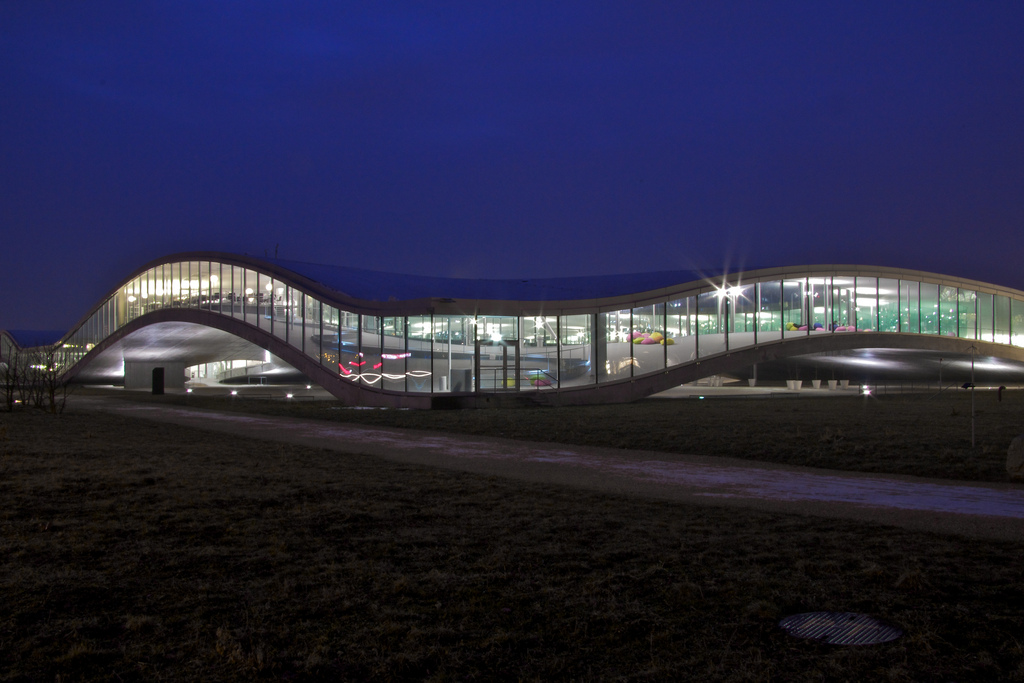

In [10]:
from IPython.display import Image
# Photos credit: https://commons.wikimedia.org/wiki/File:Rolex_Learning_center.jpg
Image('./Data/rlc.jpg', width=800,height=600)

## Videos

Videos can be embedded in the notebook. For example, here is a youtube video.

In [11]:
from IPython.display import YouTubeVideo
from datetime import timedelta

# It is possible to start the video at a specific time
start=int(timedelta(hours=0, minutes=1, seconds=45).total_seconds())

YouTubeVideo("FKXOucXB4a8", start=start, autoplay=0, theme="light", color="red")

And here is a vimeo video.

In [12]:
from IPython.display import VimeoVideo

VimeoVideo("70371614")

In [13]:
from IPython.display import IFrame

IFrame('http://library.epfl.ch/open-science-workshops', width=800, height=600)

## Audio data and interactive widgets

IPython notebook also makes it possible to listen to audio data in the browser directly. To demonstrate this, we will convolve some speech with a [room impulse response](http://nbviewer.ipython.org/github/LCAV/SignalsOfTheDay/blob/master/Room_Acoustics/Room%20Impulse%20Response.ipynb). Then we will process the room impulse response to give the illusion of a larger room.

In [37]:
from scipy.io import loadmat, wavfile
from IPython.lib.display import Audio

# import the speech from a wav file
r,speech = wavfile.read('Data/german_speech_44100.wav')
_,rir = wavfile.read('Data/RIRs.wav')

# Add the audio widget
print('Speech')
display(Audio(data=speech, rate=r))
print('Room Impulse Response')
display(Audio(data=rir[:,0], rate=r))

Speech


Room Impulse Response


The impulse responses were actually recorded with an eight microphone array.

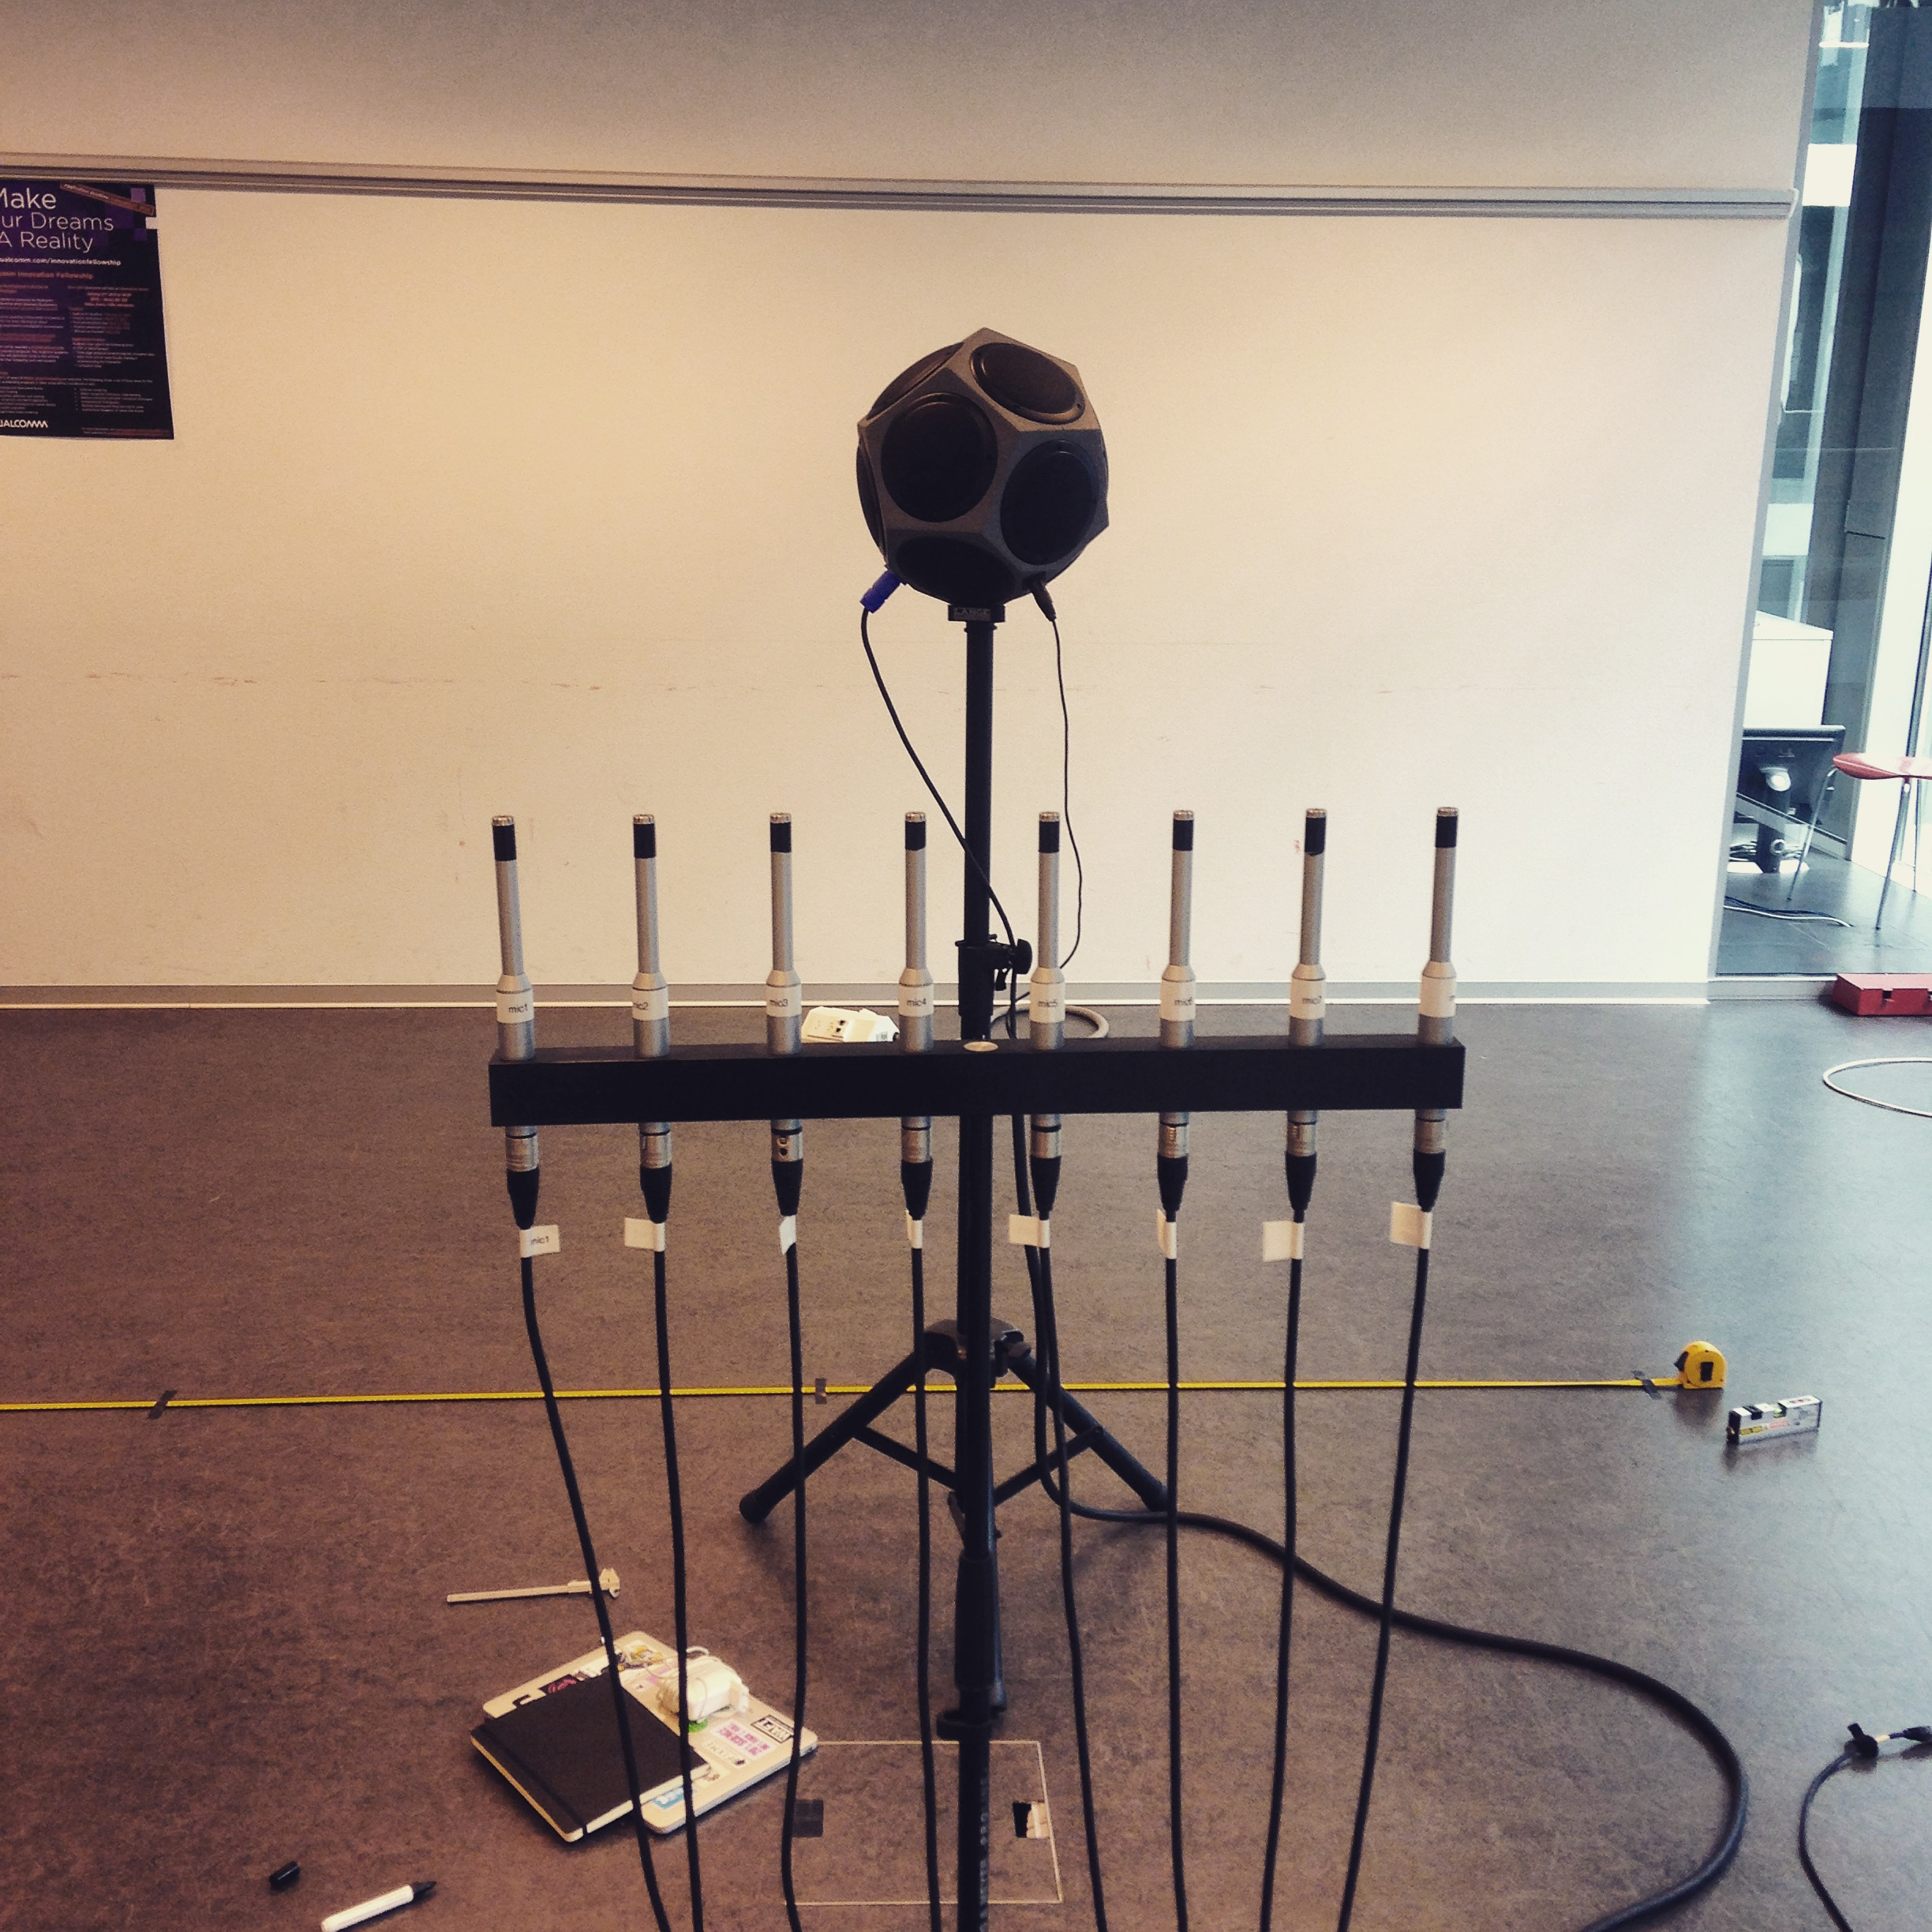

In [15]:
Image('Data/mic_array.jpg', width=200, height=200)

IPython also allows to create interactive widgets to easily visualize graphs with varying parameters. Let us use that to look at the room impulse response for the different microphones.

None

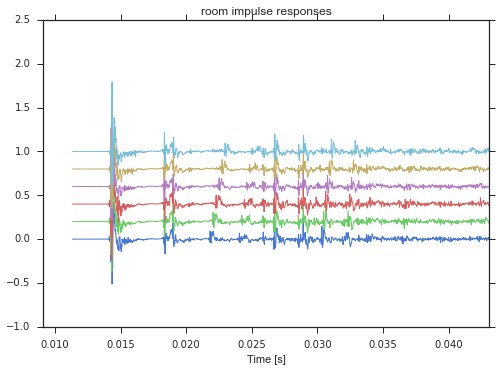

In [33]:
from IPython.html.widgets import interact, fixed

# We need to define a function that takes as arguments the parameters
# we would like to play with.
def plot_rir(s=None, length=30000, number=8, offset=False, text='helloworld'):
    if s is None:
        return
    
    if offset:
        n = 0.2
    else:
        n = 0.    
        
    plot(np.arange(500,500+length)/float(r), s[500:500+length,number-1::-1]+n*np.arange(number), linewidth=1)
    title(text)
    xlim((400./r,(400.+length)/r))
    if offset:
        ylim((-1,2.5))
    else:
        ylim((-1,1))    
    xlabel('Time [s]')

# Now we only need to call the interact function
# keyword arguments are used to give the parameter ranges
interact(plot_rir, s=fixed(rir), length=(500, 25000, 1000), number=(1,8), text=['helloworld','room impulse responses'])

The cool thing is that we are not limited to use this with plots. Let us see what happens when we stretch the room impulse response and convolve the speech with it.

Start at `stretch = 0` for anechoic speech and increase the stech factor. Notice how the room gets bigger!

In [35]:
from scipy.signal import resample, fftconvolve

def listen_rir(rir=None, speech=None, stretch=0):
    
    if rir is None or speech is None:
        return
    
    if stretch == 0:
        s = speech
    else:
        h = resample(rir, rir.shape[0]*stretch)
        s = fftconvolve(speech, h)
        
    display(Audio(data=s, rate=r))
    
interact(listen_rir, rir=fixed(rir[:,0]), speech=fixed(speech), stretch=(0,10))

None

## Analyze tweets

We have collected tweets containing the following keywords:

* reproducible research
* reproducibleresearch
* ipython notebook
* open access
* openaccess
* open science
* openscience
* open data
* opendata
* bigdata
* epfl

This example was mostly taken from this [tutorial](http://adilmoujahid.com/posts/2014/07/twitter-analytics/).

In [19]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('GnBu_d')

In [20]:
tweets_data_path = './Data/twitter_data.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

Let's first see how many tweets we got in this file.

In [21]:
print len(tweets_data)

10698


For the analysis of the tweets, we use the popular [pandas](http://pandas.pydata.org/) library.

In [22]:
tweets = pd.DataFrame()
fields = ['text','lang']
for f in fields:
    tweets[f] = map(lambda tweet: tweet[f], tweets_data)

tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)
tweets['username'] = map(lambda tweet: tweet['user']['screen_name'], tweets_data)
tweets['followers_count'] = map(lambda tweet: tweet['user']['followers_count'], tweets_data)
tweets['time_zone'] = map(lambda tweet: tweet['user']['time_zone'], tweets_data)

tweets['text_len'] = map(lambda tweet: len(tweet), tweets['text'])

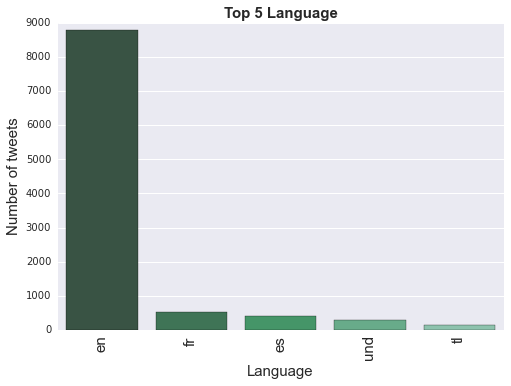

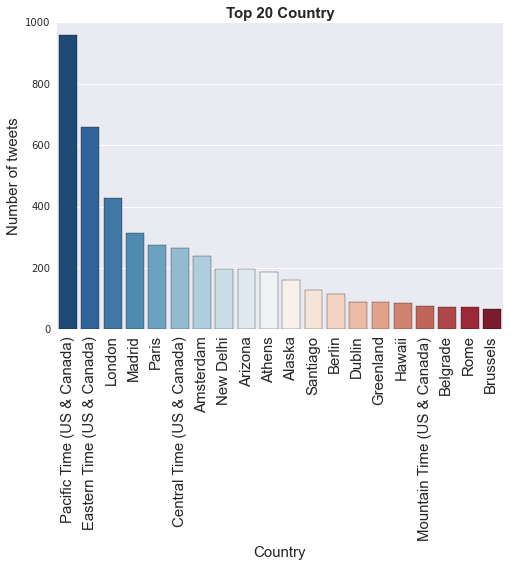

In [23]:
tweets_by_lang = tweets['lang'].value_counts()
tweets_by_country = tweets['time_zone'].value_counts()

def nice_bar_plot(xlbl, palette, data, n):

    fig, ax = plt.subplots()
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_xlabel(xlbl, fontsize=15)
    ax.set_ylabel('Number of tweets' , fontsize=15)
    ax.set_title('Top ' + str(n) + ' ' + xlbl, fontsize=15, fontweight='bold')
    sns.barplot(data[:n].keys(), data[:n], palette=palette, ax=ax)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    
nice_bar_plot('Language', 'BuGn_d', tweets_by_lang, 5)
nice_bar_plot('Country', 'RdBu_r', tweets_by_country, 20)

Now we want to analyze words appearing in the tweets. We apply some regular expressions to our tweets.

In [24]:
import re

In [25]:
def word_in_text(words, text):
    words = re.sub('\s+','\s*', ''.join([w + '|' for w in words[:-1]]) + words[-1])
    text = text.lower()
    match = re.search(words, text)
    if match:
        return True
    return False

In [26]:
keywords = ['open access', 'open science', 'bigdata', 'ipython', 'open data', 'reproducible research','epfl']
for w in keywords:
    tweets[w] = tweets['text'].apply(lambda tweet: word_in_text([w], tweet))

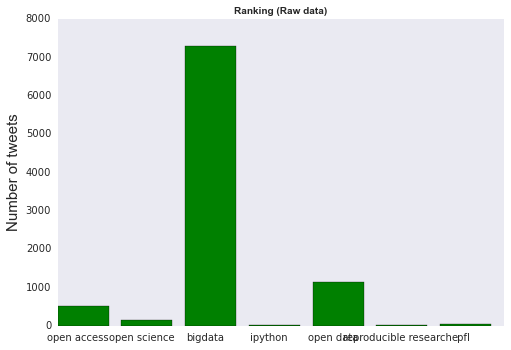

In [27]:
tweets_by_kw = [tweets[w].value_counts()[True] for w in keywords]

x_pos = list(range(len(keywords)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_kw, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking (Raw data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(keywords)
plt.grid()

In [28]:
tweets['category'] = np.nan
for kw in keywords:
    tweets.loc[tweets[kw] == True,'category'] = kw

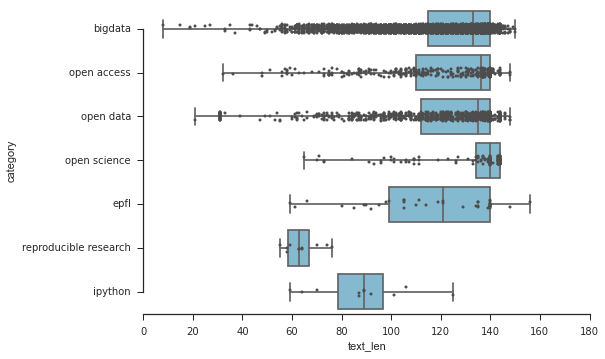

In [29]:
sns.set(style="ticks", palette="muted", color_codes=True)

# Plot the orbital period with horizontal boxes
ax = sns.boxplot(x="text_len", y="category", data=tweets,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="text_len", y="category", data=tweets,
              jitter=True, size=3, color=".3", linewidth=0)


# Make the quantitative axis logarithmic
sns.despine(trim=True)